## EC Notebook for Lecture 26: Confidence Intervals

This extra credit Python notebook will let you practice the material you saw in lecture.  Completing all parts of this notebook will earn +1 extra credit point to your grade in STAT 107! :)

This notebook is worth +1 if turned in before 11:30 am on **Wednesday, Oct. 30** *(30 minutes before the next STAT 107 lecture)*.  You can feel free to complete it anytime for extra practice.

## 1. Importing pandas and reading data
For this extra credit notebook, we will still use the GPA dataset to do some exercise. At first, you need to import the library pandas and reading the dataset.

### Calculate the size of each class
After loading the data, calculate the size of each class and add an extra column named `size` to the DataFrame. (*Hint: students with a W grade is also a part of the class.*) Observe the distribution of class size.

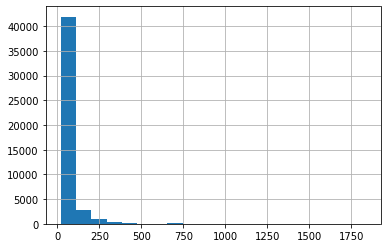

In [2]:
import pandas as pd
#import pandas
df = pd.read_csv('gpa.csv')
df['size'] = df['A+'] + df['A'] + df['A-'] + df['B+'] + df['B'] + df['B-'] + df['C+'] + df['C'] + df['C-'] + df['D+'] + df['D'] + df['D-'] + df['F'] + df['W']

df["size"].hist(bins=20)

### Class Sampling

Now lets create a function, which will sample `n` sections from the DataFrame and calculate the following values:

1. the average size of samples
2. the standard error of samples

and return them.

In [3]:
def sample_class(x):
    dfn = df.sample(n=x)
    sample_mean = dfn['size'].mean()
    sample_sem = dfn['size'].sem()

    return (sample_mean, sample_sem)



### Distribution of Average
Write a simulation to run the above function for 1000 times with `n=100` and store the results you get for each time in a DataFrame called `df_class`, which contains two cloumns `mean` and `sem`.

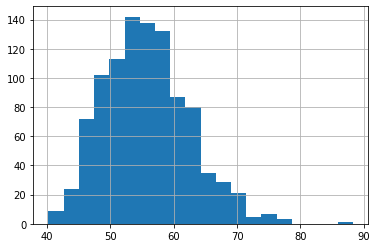

In [4]:
data = []
for i in range(1000):
    mean,sem = sample_class(100)
    d = {'mean':mean,'sem':sem}
    data.append(d)


df_class = pd.DataFrame(data)



# Let’s build visualization:
df_class["mean"].hist(bins=20)

###  Confidance Interval

What we have done above shows that when you sample averages from a non-normal distribution, you get a normal distribution out. Now let's calculate the **95%** confidance interval bound given the above sampling.

In [5]:
from scipy.stats import norm 

sample_mean = df_class['mean'].mean()
sample_error = df_class['mean'].sem()
z_value = norm.ppf(0.975)

df_class["left_ci"] = sample_mean - (z_value * sample_error)
df_class["right_ci"] = sample_mean + (z_value * sample_error)


df_class.sample(5)

,mean,sem,left_ci,right_ci
241,50.17,4.264347,55.318647,56.156233
911,57.51,7.533085,55.318647,56.156233
855,69.54,10.514160,55.318647,56.156233
189,47.60,4.592968,55.318647,56.156233
603,45.15,3.612978,55.318647,56.156233


In [6]:
## == TEST CASES for Part 1,2,3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(df["size"]) == len(df)), "Make sure you added the correct size of each class."
assert(len(df_class["mean"]) == 1000), "Make sure you create the right dataframe df_class."
assert(len(df_class["sem"]) == 1000), "Make sure you create the right dataframe df_class."
assert(len(df_class["left_ci"]) == 1000), "Make sure you create the right dataframe df_class."
assert(len(df_class["right_ci"]) == 1000), "Make sure you create the right dataframe df_class."
assert(abs((df_class["left_ci"] +  df_class["right_ci"]- 2*df_class["mean"]).sum()) < 0.0001), "The bound seems not to be right."


## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()


🎉 All tests passed! 🎉

